# O que é análise de cesta de mercado?
Em primeiro lugar, é ferramentas para identificar quais os produtos mais frequentemente comprados em conjunto.
Um exemplo disso, seria uma loja de livros, onde livros de biografia e história ou livros de ficção e poesia são comprados frequentemente em conjuntos. 

## Onde pode ser Usado?

- Pode ser usado como um modelo de recomendação.
- Venda cruzada de produtos em lojas de varejo.
- Melhore a gestão de estoque.
- Selecione itens para fazer upsell.

## Usando a análise da cesta de mercado
A análise da cesta de mercado é estruturada em torno do uso de algo chamado "regras de associação". As regras de associação nos dizem que os itens estão associados uns aos outros, talvez porque sejam comprados juntos com frequência. Tais regras assumem a forma de uma relação se-então entre dois conjuntos de itens. O primeiro é chamado de antecedente e o segundo é chamado de consequente. Se, por exemplo, descobrirmos que a compra de livros de ficção está associada à compra de biografias, como indicam as transações à esquerda do slide, então afirmamos como a seguinte regra: "se ficção, então biografia".

## Carregando os dados
Vamos encontrar algumas regras úteis. Começaremos carregando os dados da livraria. 







## Dados
https://www.kaggle.com/competitions/booknew/data


https://www.kaggle.com/datasets/heeraldedhia/groceries-dataset

In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta
from datetime import datetime as dt


In [ ]:
#Carregando informações do drive.
df_g = pd.read_csv("/content/drive/MyDrive/Datasets/Groceries_dataset.csv")

#Primeiras 5 linhas do dataset
print(df_g.head())

   Member_number        Date   itemDescription
0           1808  21-07-2015    tropical fruit
1           2552  05-01-2015        whole milk
2           2300  19-09-2015         pip fruit
3           1187  12-12-2015  other vegetables
4           3037  01-02-2015        whole milk


In [ ]:
df_g.itemDescription.nunique()

167

In [ ]:
item_qty_g = df_g[['Member_number', 'Date','itemDescription']]\
.groupby(['Member_number','Date']).count().reset_index()
item_qty_g.head()

,Member_number,Date,itemDescription
0,1000,15-03-2015,4
1,1000,24-06-2014,3
2,1000,24-07-2015,2
3,1000,25-11-2015,2
4,1000,27-05-2015,2


Text(0.5, 1.0, 'Histograma de produtos comprados juntas')

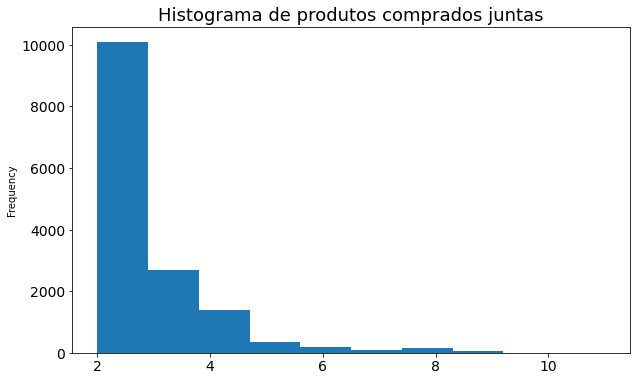

In [ ]:
item_qty_g.itemDescription.plot(figsize=(10,6), kind='hist',
                              legend=False, fontsize=14)
plt.title('Histograma de produtos comprados juntas', fontsize=18)

In [ ]:
#Carregando informações do drive.
df_b = pd.read_csv("/content/drive/MyDrive/Datasets/orders.csv")

In [ ]:
df_b.head()

,id,ordnum,t,category,qty,price,brandid
0,2909359,107865,2301,1,1,12.78,1
1,4154444,393436,1674,1,1,12.78,1
2,2510081,18337,2555,17,1,61.36,1
3,5499534,16637,2556,17,1,50.11,1
4,149438,37870,2493,19,1,20.35,1


- **id**: ID do cliente.
- **ordnum**: identifica exclusivamente um pedido.
- **t**: tempo em dias desde o pedido (1 seria ontem e 365 seria um ano atrás).
- **category**: identificador de categoria para o item: 1=fiction; 3=classics; 5=cartoons; 6=legends; 7=philosophy; 8=religion; 9=psychology; 10=linguistics; 12=art; 14=music; 17=art reprints; 19=history; 20=contemporary history; 21=economy; 22=politics; 23=science; 26=computer science; 27=traffic, - railroads; 30=maps; 31=travel guides; 35=health; 36=cooking; 37=learning; 38=games and riddles; 39=sports; 40=hobby; 41=nature/animals/plants; 44=encyclopedia; 50=videos, DVDs; 99=non books
- **qty**: Number of items ordered
- **price**: price per item (a person who orders qty=2 copies of a book for 10 Euros would have a total amount of 2*10=20 Euros)
- **brandid**: the company has three separate brands selling different kinds of books. This offer is from brand 1.

In [ ]:
item_qty_b = df_b[['id', 'ordnum','category']]\
.groupby(['id','ordnum']).count().reset_index()
item_qty_b.head()

,id,ordnum,category
0,957,38650,3
1,957,48972,1
2,957,59966,4
3,957,108749,2
4,957,150011,2


Text(0.5, 1.0, 'Histograma de generos comprados juntas')

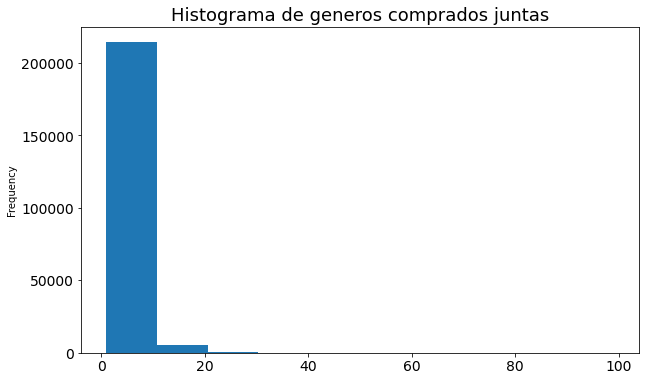

In [ ]:
item_qty_b.category.plot(figsize=(10,6), kind='hist',
                              legend=False, fontsize=14)
plt.title('Histograma de generos comprados juntas', fontsize=18)

In [ ]:
small_itens = item_qty_b[item_qty_b["category"] < 10]

Text(0.5, 1.0, 'Histograma de generos comprados juntas')

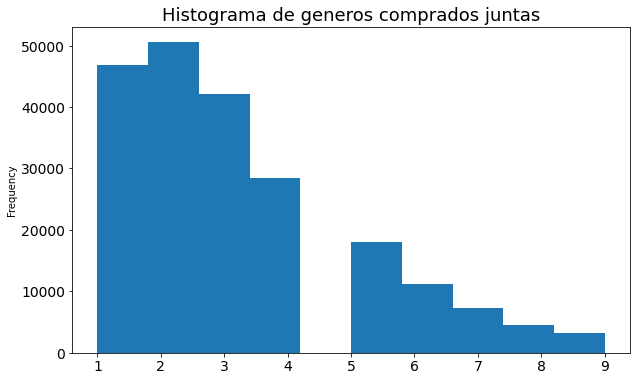

In [ ]:
small_itens.category.plot(figsize=(10,6), kind='hist',
                              legend=False, fontsize=14)
plt.title('Histograma de generos comprados juntas', fontsize=18)

In [ ]:
books = (df_b.set_index('t')
     .groupby(['id','ordnum'],sort=False)
     .agg({'category':list})).reset_index()

In [ ]:
books.head()

,id,ordnum,category
0,2909359,107865,"[1, 44]"
1,4154444,393436,[1]
2,2510081,18337,"[17, 17, 99]"
3,5499534,16637,"[17, 17, 12]"
4,149438,37870,"[19, 38, 23, 35, 14, 8, 44]"


In [ ]:
books.rename(columns={'id':'Customer_ID',
                         'ordnum': 'Transaction_ID',
                         'category': 'Transaction'},inplace=True

)

## Construindo transações
Agora que carregamos os dados, precisamos fazer um pré-processamento leve. Começaremos dividindo cada transação, que é carregada como uma string, em uma lista. Podemos fazer isso para a coluna inteira usando uma função lambda. Em seguida, converteremos essa coluna em uma lista, gerando uma lista de listas.

In [ ]:
#Split transaction strings into lists.
books["transactions"] = books['Transaction'].apply(lambda t: " ".join(str(i) for i in t))

In [ ]:
books.head()

,Customer_ID,Transaction_ID,Transaction,transactions
0,2909359,107865,"[1, 44]",1 44
1,4154444,393436,[1],1
2,2510081,18337,"[17, 17, 99]",17 17 99
3,5499534,16637,"[17, 17, 12]",17 17 12
4,149438,37870,"[19, 38, 23, 35, 14, 8, 44]",19 38 23 35 14 8 44


In [ ]:
#Split transaction strings into lists.
transactions=books['transactions'].apply(lambda t: t.split(' '))

#Convert DataFrame into list of strings.
transactions=list(transactions) 

In [ ]:
books.transactions = transactions

## Para Groceries

In [ ]:
df_g.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [ ]:
groceries = df_g.groupby(['Member_number', 'Date'])\
.agg({'itemDescription': lambda x: x.ravel().tolist()}).reset_index()
groceries.head()

,Member_number,Date,itemDescription
0,1000,15-03-2015,"[sausage, whole milk, semi-finished bread, yog..."
1,1000,24-06-2014,"[whole milk, pastry, salty snack]"
2,1000,24-07-2015,"[canned beer, misc. beverages]"
3,1000,25-11-2015,"[sausage, hygiene articles]"
4,1000,27-05-2015,"[soda, pickled vegetables]"


Para ter alguma intuição do que acabamos de fazer, vamos imprimir o primeiro item da lista de transações para ver como ela está formatada. 

In [ ]:
transactions = list(groceries.itemDescription.values)

In [ ]:
transactions[0:10]

[['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables'],
 ['frankfurter', 'curd'],
 ['sausage', 'whole milk', 'rolls/buns'],
 ['whole milk', 'soda'],
 ['beef', 'white bread'],
 ['frankfurter', 'soda', 'whipped/sour cream']]

## Contando os conjuntos de itens
Agora que sabemos como os itens da lista são formatados, vamos passar alguns para o método count, que nos dirá quantas transações contêm exatamente o mesmo conjunto de itens que passamos para ele. 



In [ ]:
# Conte o numero de transacoes que contém whole milk e salty snack
transactions.count(["whole milk","salty snack"])

3

In [ ]:
# Conte o numero de transacoes que contém whole milk e soda
transactions.count(["whole milk","soda"])

26

In [ ]:
# Conte o numero de transacoes que contém whole milk e sausage
transactions.count(["whole milk","sausage"])

1

## Fazendo uma recomendação
Se tentarmos whole milk e soda, muitas outras transações parecem conter essa lista. Isso sugere que devemos recomendar que o proprietário agrupe whole milk e soda, em vez de whole milk e salty snack.

# Produtos de venda cruzada
A loja decidiu fazer vendas cruzadas de salty snack, sausage ou soda. Para determinar qual dos três itens é melhor usar, o dono da loja realizou um experimento. Durante uma semana, ela vendeu whole milk ao lado do caixa e registrou todas as transações em que foram compradas com salty snack, sausage ou soda. 


In [ ]:
# Conte o numero de transacoes que contém whole milk e salty snack
salty_snack = transactions.count(["whole milk","salty snack"])

# Conte o numero de transacoes que contém whole milk e soda
soda = transactions.count(["whole milk","soda"])

# Conte o numero de transacoes que contém whole milk e sausage
sausage = transactions.count(["whole milk","sausage"])

# Print the counts for each transaction.
print('salty_snack:',salty_snack)
print('soda:', soda)
print('sausage:', sausage)

salty_snack: 3
soda: 26
sausage: 1


## Múltiplos antecedentes e consequentes
A análise da cesta de mercado gira em torno do uso de regras de associação, que são declarações se-então sobre o relacionamento entre dois conjuntos de itens. A regra {Cartoons} --> {Economia}, por exemplo, é lida como "se cartoons então Economia", onde Cartoons é o antecedente e a Economia o consequente. Muitas regras têm múltiplos antecedentes e consequentes

Encontrar boas regras pode ser um desafio. Para a maioria dos conjuntos de dados, o número de regras possíveis é enorme. Como a maioria das regras não é útil, devemos encontrar uma maneira de descartar regras que provavelmente não serão úteis para a tarefa em questão. Poderíamos começar, por exemplo, olhando exclusivamente para regras simples com um antecedente e um consequente. 

## Gerando as regras
Vamos percorrer todas as regras de um antecedente e uma consequênte. Podemos fazer isso começando com aqueles que têm a ficção como antecedente e emparelhando a ficção com todos os consequentes possíveis. Em seguida, mudamos para a história como antecedente e a associamos a todos os consequentes possíveis. Repetimos isso para todos os antecedentes possíveis restantes. Como consideramos apenas itens únicos em uma transação, não incluímos regras onde o antecedente e o consequente são os mesmos.

## Gerando regras de associação
As permutações de função do módulo itertools podem ser usadas para gerar rapidamente o conjunto de todas as regras de um antecedente e uma consequênte. Você não sabe, é claro, quais dessas regras são úteis. Você simplesmente sabe que cada um é uma maneira válida de combinar dois itens.

Vamos praticar a geração e a contagem do conjunto de todas as regras para um subconjunto do conjunto de dados de uma livraria.

In [ ]:
groceries.head()

,Member_number,Date,itemDescription
0,1000,15-03-2015,"[sausage, whole milk, semi-finished bread, yog..."
1,1000,24-06-2014,"[whole milk, pastry, salty snack]"
2,1000,24-07-2015,"[canned beer, misc. beverages]"
3,1000,25-11-2015,"[sausage, hygiene articles]"
4,1000,27-05-2015,"[soda, pickled vegetables]"


In [ ]:
# Import permutations from the itertools module
from itertools import permutations

# Definimos o conjunto de livros
flattened = [item for transaction in transactions for item in transaction]
groceries_itens = list(set(flattened))

In [ ]:
# Generate all possible rules from bookstore list
regras = list(permutations(groceries_itens, 2))

In [ ]:
# Print the set of rules
print(regras)

# Print the number of rules
print(len(regras))

[('long life bakery product', 'soups'), ('long life bakery product', 'soap'), ('long life bakery product', 'cookware'), ('long life bakery product', 'skin care'), ('long life bakery product', 'sugar'), ('long life bakery product', 'kitchen towels'), ('long life bakery product', 'brandy'), ('long life bakery product', 'beef'), ('long life bakery product', 'frozen dessert'), ('long life bakery product', 'red/blush wine'), ('long life bakery product', 'rice'), ('long life bakery product', 'nut snack'), ('long life bakery product', 'male cosmetics'), ('long life bakery product', 'roll products '), ('long life bakery product', 'frozen meals'), ('long life bakery product', 'nuts/prunes'), ('long life bakery product', 'frankfurter'), ('long life bakery product', 'jam'), ('long life bakery product', 'ready soups'), ('long life bakery product', 'grapes'), ('long life bakery product', 'liqueur'), ('long life bakery product', 'cat food'), ('long life bakery product', 'curd'), ('long life bakery p

In [ ]:
groceries.itemDescription[0]

['sausage', 'whole milk', 'semi-finished bread', 'yogurt']

In [ ]:
import itertools
list(itertools.combinations(groceries.itemDescription[0], 2))

[('sausage', 'whole milk'),
 ('sausage', 'semi-finished bread'),
 ('sausage', 'yogurt'),
 ('whole milk', 'semi-finished bread'),
 ('whole milk', 'yogurt'),
 ('semi-finished bread', 'yogurt')]

In [ ]:
combinations_list = []
for row in groceries.itemDescription:
    combinations = list(itertools.combinations(row, 2))
    combinations_list.append(combinations)

In [ ]:
combinations_list[1]

[('whole milk', 'pastry'),
 ('whole milk', 'salty snack'),
 ('pastry', 'salty snack')]



## Métricas e poda
Uma métrica é uma medida do desempenho de uma regra. Por exemplo, sob alguma métrica, a regra "se humor, então poesia" pode ser mapeada para o número `0.81`. A mesma métrica pode render `0.23`. para "se ficção, então viagem".

A poda faz uso de uma métrica para descartar regras. Por exemplo, poderíamos manter apenas as regras com um valor de métrica maior que `0.50`. No exemplo que demos, reteríamos "se humor, então poesia" e descartaríamos "se ficção, então viagem".

### Métrica de Suporte
Chamado de suporte, que mede a frequência com que os conjuntos de itens aparecem nas transações. O suporte também pode ser aplicado a itens únicos. Por exemplo, no conjunto de dados de pequenas mercearias, o leite é um dos nove itens que aparecem nas transações. Podemos calcular o suporte do leite como o número de transações que contêm leite, dividido pelo número total de transações.

$$ \dfrac{Number \ \ of \ \ transactions \ \ with \ \ items}{Number \ \ of \ \ transactions}$$

Por exemplo:

$$ \dfrac{Number \ \ of \ \ transactions \ \ with \ \ economy}{Total \ \ transactions}$$

#One-hot encoding Dados de transação
O primeiro passo é importar um DataFrame pandas e selecionar a coluna que contém as transações. Cada transação na coluna será uma string que consiste em vários itens, cada um separado por uma vírgula. A próxima etapa é usar uma função lambda para dividir cada string de transação em uma lista, transformando assim a coluna em uma lista de listas.

DataFrame codificado one-hot, onde cada coluna consiste em valores TRUE e FALSE que indicam se um item foi incluído em uma transação.

In [ ]:
df_g.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [ ]:
transactions[0:10]

[['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables'],
 ['frankfurter', 'curd'],
 ['sausage', 'whole milk', 'rolls/buns'],
 ['whole milk', 'soda'],
 ['beef', 'white bread'],
 ['frankfurter', 'soda', 'whipped/sour cream']]

In [ ]:
# Import the transaction encoder 
from mlxtend.preprocessing import TransactionEncoder

# Instancie o codificador de transações e identifique itens exclusivos nas transações
encoder = TransactionEncoder().fit(transactions)

# Transações de codificação one-hot
onehot = encoder.transform(transactions)

# Converter one-hot para DataFrame
onehot = pd.DataFrame(onehot, columns = encoder.columns_)

In [ ]:
onehot.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
onehot.shape

(14963, 167)

#Calculando a métrica de suporte


In [ ]:
# Compute the support
support = onehot.mean()

# Print the support
print(support)

Instant food products    0.004010
UHT-milk                 0.021386
abrasive cleaner         0.001470
artif. sweetener         0.001938
baby cosmetics           0.000200
                           ...   
white bread              0.023993
white wine               0.011696
whole milk               0.157923
yogurt                   0.085879
zwieback                 0.004010
Length: 167, dtype: float64


In [ ]:
# Add a jam+bread column to the DataFrame onehot
onehot['sausage+whole milk'] = np.logical_and(onehot['sausage'], onehot['whole milk'])

# Compute the support
support = onehot.mean()

# Print the support values
print(support)

Instant food products    0.004010
UHT-milk                 0.021386
abrasive cleaner         0.001470
artif. sweetener         0.001938
baby cosmetics           0.000200
                           ...   
white wine               0.011696
whole milk               0.157923
yogurt                   0.085879
zwieback                 0.004010
sausage+whole milk       0.008955
Length: 168, dtype: float64


 “Market Basket Analysis” is one of the best applications of machine learning in the retail industry. By analyzing the past buying behavior of customers, we can find out which are the products that are bought frequently together by the customers.